# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
# Resolver acá
import requests 
from bs4 import BeautifulSoup 
import pandas as pd 

In [3]:
buscar = "silla de plastico"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"silla de plastico","paging":{"total":5435,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1420983515","title":"Sillas Plasticas Apilables Reforzadas Galana Malba Pack 6 Color Negro","condition":"new","thumbnail_id":"887518-MLU75756855044_042024","catalog_product_id":"MLA35547762","listing_type_id":"gold_special","sanitized_title":"sillas-plasticas-apilables-reforzadas-galana-malba-pack-6-color-negro","permalink":"https://www.mercadolibre.com.ar/sillas-plasticas-apilables-reforzadas-galana-malba-pack-6-color-negro/p/MLA35547762#wid=MLA1420983515&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA74619","domain_id":"MLA-GARDEN_CHAIRS_BENCHES_AND_SOFAS","thumbnail":"http://http2.mlstatic.com/D_887518-MLU75756855044_042024-I.jpg","currency_id":"ARS","order_backend":1,"price":151563.6,"original_price":168404,"sale_price":{"price_id":"","amount":151563.6,"conditions":{"eligible":true,

In [4]:
# Guardo el resultado en un diccionario
data = response.json() # convertir el contenido de una respuesta HTTP en formato JSON a un objeto Python 
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'silla de plastico',
 'paging': {'total': 5435, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1420983515',
   'title': 'Sillas Plasticas Apilables Reforzadas Galana Malba Pack 6 Color Negro',
   'condition': 'new',
   'thumbnail_id': '887518-MLU75756855044_042024',
   'catalog_product_id': 'MLA35547762',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'sillas-plasticas-apilables-reforzadas-galana-malba-pack-6-color-negro',
   'permalink': 'https://www.mercadolibre.com.ar/sillas-plasticas-apilables-reforzadas-galana-malba-pack-6-color-negro/p/MLA35547762#wid=MLA1420983515&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA74619',
   'domain_id': 'MLA-GARDEN_CHAIRS_BENCHES_AND_SOFAS',
   'thumbnail': 'http://http2.mlstatic.com/D_887518-MLU75756855044_042024-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 151563.6,
   '

In [5]:
# Accedo a los datos
print('Longitud de lista de resultados:', len(data['results']))
print('Precio del primer resultado:', data['results'][0]['price'])

# Link del primer resultado
print(data['results'][0]['permalink'])

Longitud de lista de resultados: 50
Precio del primer resultado: 151563.6
https://www.mercadolibre.com.ar/sillas-plasticas-apilables-reforzadas-galana-malba-pack-6-color-negro/p/MLA35547762#wid=MLA1420983515&sid=unknown


#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [6]:
df_ml = response.json() #convertir el contenido de una respuesta HTTP en formato JSON a un objeto Python
df_ml

import pandas as pd

precios = [producto ["price"] for producto in df_ml["results"]] #Se accede a cada producto y se extrae el valor de la clave "price"
df_precios=pd.DataFrame({"Precios":precios}) # Crea un DataFrame con una columna llamada "Precios" que contiene los valores de la lista precios.
df_precios

max = df_precios.max()
print ("Maximo:", max) #devuelve el valor máximo en la columna "Precios"

min = df_precios.min()
print ("Minimo:", min)  #devuelve el valor mínimo en la columna "Precios"

prom = df_precios.mean()
print ("Promedio:", prom)  #devuelve el promedio en la columna "Precios"

Maximo: Precios    329247.97
dtype: float64
Minimo: Precios    12683.7
dtype: float64
Promedio: Precios    133192.074
dtype: float64


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

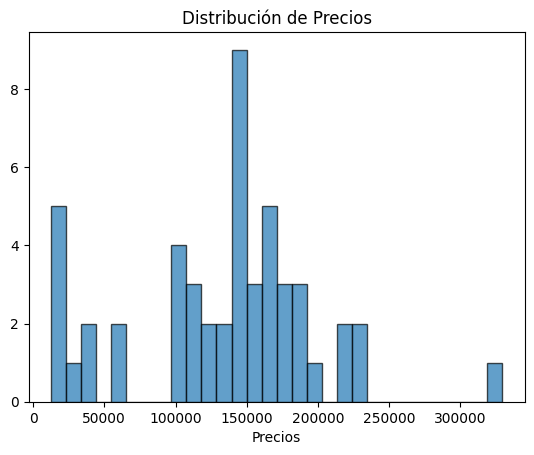

In [7]:
# Resolver acá
import matplotlib.pyplot as plt

# Mostrar el histograma de los precios
plt.hist(df_precios['Precios'], bins=30, edgecolor='black', alpha=0.7) # histograma 
plt.title('Distribución de Precios') # titulo del grafico
plt.xlabel('Precios') # etiqueta de eje X
plt.show()

In [22]:
# a simple vista se observa un outlier, igualmente, calculamos los cuartiles para asegurarnos 

Q1 = df_precios['Precios'].quantile(0.25)
Q3 = df_precios['Precios'].quantile(0.75)

IQR = Q3 - Q1 # rango intercuartílico (IQR)

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_precios[(df_precios['Precios'] < limite_inferior) | (df_precios['Precios'] > limite_superior)]

# Mostrar los outliers
print(outliers)


      Precios
29  329247.97


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [24]:
# Resolver acá
import requests
import pandas as pd

# Definir el ID del vendedor 
vendedor = "179571326" 

# Definir la URL para consultar los productos del vendedor
url = f"https://api.mercadolibre.com/sites/MLA/search?seller_id={vendedor}" # función con el url correspondiente al vendedor de la variable "vendedor"

# Realizar la solicitud GET a la API de Mercado Libre
response = requests.get(url) # Hace una solicitud 
data = response.json() # Convierte el contenido de la respuesta JSON en un objeto Python

# Extraer información de los productos: título y si acepta Mercado Pago
productos = []
for producto in data['results']:
    "recorre una lista de productos obtenida de un conjunto de datos en formato JSON y extrae dos atributos de cada producto"
    titulo = producto['title']
    acepta_mercado_pago = producto['accepts_mercadopago']
    productos.append([titulo, acepta_mercado_pago])

# Crear un DataFrame con los datos
df_productos = pd.DataFrame(productos, columns=['Título', 'Acepta Mercado Pago'])
print(df_productos.head())

# Mostrar el DataFrame completo
print(df_productos)


                                              Título  Acepta Mercado Pago
0  Televisor Samsung Smart Tv Negro T4300 - Panta...                 True
1  Notebook Dell Inspiron 3525 Silver 15.6 , Amd ...                 True
2  Notebook Inspiron 3525 15.5  Color Plata 32gb ...                 True
3  Consola Ps5 Slim Estándar + Juego Ratchet & Cl...                 True
4  Apc Easy Ups Bv1000i-ar 1000va Entrada Y Salid...                 True
                                               Título  Acepta Mercado Pago
0   Televisor Samsung Smart Tv Negro T4300 - Panta...                 True
1   Notebook Dell Inspiron 3525 Silver 15.6 , Amd ...                 True
2   Notebook Inspiron 3525 15.5  Color Plata 32gb ...                 True
3   Consola Ps5 Slim Estándar + Juego Ratchet & Cl...                 True
4   Apc Easy Ups Bv1000i-ar 1000va Entrada Y Salid...                 True
5   Tablet  Con Funda Lenovo Tab M10 3rd Gen Tb328...                 True
6   Tablet Lenovo Tab M10 Plus 

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [18]:
# Resolver acá

!pip install openpyxl

url = "https://www.lanacion.com.ar/"

# url que contiene la dirección web de la página que quieres analizar (La Nación)

r = requests.get(url) #traigo el contenido del html
contenido = r.content # Este contenido es el HTML bruto de la página web.

soup = BeautifulSoup(contenido, "html.parser") # "html.parser" para convertir el HTML en un árbol de objetos Python.
soup


<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/alberto-pagliano-expresidente-de-nacion-seguros-GUD5UQEJTBCRFANPXVDO4553O4.jpeg?auth=93d419d0cda5caade471775a200e09723e10a17ae0929aad49ccd3c30ca86f5e&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/alberto-pagliano-expresidente-de-nacion-seguros-GUD5UQEJTBCRFANPXVDO4553O4.jpeg?auth=93d419d0cda5caade471775a200e09723e10a17ae0929aad49ccd3c30ca86f5e&amp;width=302&amp;height=201&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><style id="critical-fonts">
@font-

In [13]:
# Encontrar todos los enlaces de noticias en la página
links = soup.find_all('a', href=True)

In [28]:
# Palabras clave comunes que aparecen en los links de noticias
palabras_clave = ["/politica/", "/deportes/", "/economia/", "/sociedad/", "/internacional/", "/cultura/", "/tecnologia/"]

# Filtrar los links que parecen ser de noticias
noticias_links = []
for link in links:
    href = link.get('href', '')  # Usa get para evitar errores si el href no existe.
    
    # Verificar si es un enlace relativo y si contiene alguna palabra clave de noticias
    if href.startswith('/') and any(palabra in href for palabra in palabras_clave):
        href_completo = "https://www.lanacion.com.ar" + href
        noticias_links.append(href_completo)

    else: 
        print(href) # observar href

# Crear un DataFrame con los links de noticias
df_links = pd.DataFrame(noticias_links, columns=["Links"])

# Exportar a un archivo Excel
df_links.to_excel("links_noticias.xlsx", index=False)

/clima/
https://club.lanacion.com.ar/
https://lnmas.lanacion.com.ar/
https://foodit.lanacion.com.ar/
https://canchallena.lanacion.com.ar/
https://bonvivir.com/
/
https://www.lanacion.com.ar/dolar-hoy/
https://www.lanacion.com.ar/tema/dolar-blue-tid67294/
https://www.lanacion.com.ar/tema/dolar-turista-tid67475/
https://www.lanacion.com.ar/tema/dolar-ccl/
https://www.lanacion.com.ar/tema/dolar-mep/
https://www.lanacion.com.ar/juegos/
https://www.lanacion.com.ar/suscriptores/
https://newsletter.lanacion.com.ar/?_ga=2.115587013.2111665650.1713785519-1414281100.1711030569
https://www.lanacion.com.ar/
#
https://foodit.lanacion.com.ar/
https://club.lanacion.com.ar/
https://myaccount.lanacion.com.ar/mi-usuario/
https://www.lanacion.com.ar/ultimas-noticias/
https://www.lanacion.com.ar/transito/
https://www.lanacion.com.ar/clima/
https://www.lanacion.com.ar/data/
https://www.lanacion.com.ar/politica/
https://www.lanacion.com.ar/economia/
https://www.lanacion.com.ar/dolar-hoy/
https://www.lanacio